### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import re

In [2]:
# Check matplotlib version

matplotlib.__version__

'3.5.2'

In [3]:
# Ensure charts are displayed without having to call them specifically

%matplotlib inline

In [4]:
# folder path
path = r'C:\Users\jpelc\Documents\07-2023 UFC-Fight historical data'
# Importing orders.csv 
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'UFC_data_clean2.csv'))

In [5]:
df.head()

,Unnamed: 0,R_fighter,B_fighter,R_Knockdown,B_Knockdown,R_Significant_Strikes,B_Significant_Strikes,R_Significant_Strike_Percent,B_Significant_Strike_Percent,R_Total_Strikes,...,R_Ground_Control,B_Ground_Control,R_Ground_Strikes,B_Ground_Strikes,win_by,No_of_rounds,date,location,fight_type,Winner
0,0,Adrian Yanez,Gustavo Lopez,2,0,41 of 103,23 of 51,39%,45%,41 of 103,...,0:03,0:00,0 of 1,0 of 0,KO/TKO,3.0,2021-03-20,"Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez
1,1,Trevin Giles,Roman Dolidze,0,0,27 of 57,32 of 67,47%,47%,43 of 73,...,1:15,4:15,8 of 10,1 of 2,Decision - Unanimous,3.0,2021-03-20,"Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles
2,2,Tai Tuivasa,Harry Hunsucker,1,0,14 of 18,2 of 6,77%,33%,14 of 18,...,0:10,0:00,5 of 8,0 of 0,KO/TKO,3.0,2021-03-20,"Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa
3,3,Cheyanne Buys,Montserrat Conejo,0,0,31 of 65,15 of 41,47%,36%,49 of 87,...,1:04,9:53,3 of 7,0 of 0,Decision - Unanimous,3.0,2021-03-20,"Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo
4,4,Marion Reneau,Macy Chiasson,0,0,30 of 63,51 of 138,47%,36%,59 of 93,...,2:15,3:48,0 of 0,2 of 4,Decision - Unanimous,3.0,2021-03-20,"Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson


In [6]:
#remove unamed columns
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.head()

,R_fighter,B_fighter,R_Knockdown,B_Knockdown,R_Significant_Strikes,B_Significant_Strikes,R_Significant_Strike_Percent,B_Significant_Strike_Percent,R_Total_Strikes,B_Total_Strikes,...,R_Ground_Control,B_Ground_Control,R_Ground_Strikes,B_Ground_Strikes,win_by,No_of_rounds,date,location,fight_type,Winner
0,Adrian Yanez,Gustavo Lopez,2,0,41 of 103,23 of 51,39%,45%,41 of 103,23 of 51,...,0:03,0:00,0 of 1,0 of 0,KO/TKO,3.0,2021-03-20,"Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez
1,Trevin Giles,Roman Dolidze,0,0,27 of 57,32 of 67,47%,47%,43 of 73,75 of 110,...,1:15,4:15,8 of 10,1 of 2,Decision - Unanimous,3.0,2021-03-20,"Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,1,0,14 of 18,2 of 6,77%,33%,14 of 18,2 of 6,...,0:10,0:00,5 of 8,0 of 0,KO/TKO,3.0,2021-03-20,"Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,0,0,31 of 65,15 of 41,47%,36%,49 of 87,136 of 168,...,1:04,9:53,3 of 7,0 of 0,Decision - Unanimous,3.0,2021-03-20,"Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo
4,Marion Reneau,Macy Chiasson,0,0,30 of 63,51 of 138,47%,36%,59 of 93,92 of 184,...,2:15,3:48,0 of 0,2 of 4,Decision - Unanimous,3.0,2021-03-20,"Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson


In [8]:
print(df['fight_type'].unique())

df['fight_type'] = df['fight_type'].str.replace('Bout', '')
df['fight_type'] = df['fight_type'].str.replace('Title', '')
df['fight_type'] = df['fight_type'].str.replace('Tournament', '')
df['fight_type'] = df['fight_type'].str.replace('Ultimate Fighter', '')
df['fight_type'] = df['fight_type'].str.replace('Ultimate Japan', '')
df['fight_type'] = df['fight_type'].str.replace('Super', '')
df['fight_type'] = df['fight_type'].str.replace('UFC', '')
df['fight_type'] = df['fight_type'].str.replace('Interim', '')
df['fight_type'] = df['fight_type'].str.replace('Brazil', '')
df['fight_type'] = df['fight_type'].str.replace('America', '')
df['fight_type'] = df['fight_type'].str.replace('China', '')
df['fight_type'] = df['fight_type'].str.replace('TUF', '')
df['fight_type'] = df['fight_type'].str.replace('Australia', '')
df['fight_type'] = df['fight_type'].str.replace('Nations', '')
df['fight_type'] = df['fight_type'].str.replace('Canada', '')
df['fight_type'] = df['fight_type'].str.replace('vs.', '')
df['fight_type'] = df['fight_type'].str.replace('UK', '')
df['fight_type'] = df['fight_type'].str.replace('Latin', '')
df['fight_type'] = df['fight_type'].str.replace("Women's", 'W')

df['fight_type'] = df['fight_type'].str.strip()
df.head()

['Bantamweight Bout' 'Middleweight Bout' 'Heavyweight Bout'
 "Women's Strawweight Bout" "Women's Bantamweight Bout" 'Lightweight Bout'
 'Welterweight Bout' 'Flyweight Bout' 'Light Heavyweight Bout'
 'Featherweight Bout' "Women's Flyweight Bout"
 'UFC Bantamweight Title Bout' 'UFC Light Heavyweight Title Bout'
 "UFC Women's Featherweight Title Bout" 'UFC Welterweight Title Bout'
 'Catch Weight Bout' 'UFC Flyweight Title Bout'
 "UFC Women's Flyweight Title Bout" 'UFC Lightweight Title Bout'
 'UFC Middleweight Title Bout' 'UFC Heavyweight Title Bout'
 'UFC Featherweight Title Bout' 'UFC Interim Lightweight Title Bout'
 "UFC Women's Strawweight Title Bout" "Women's Featherweight Bout"
 "UFC Women's Bantamweight Title Bout"
 'UFC Interim Middleweight Title Bout'
 'Ultimate Fighter 28 Heavyweight Tournament Title Bout'
 "Ultimate Fighter 28 Women's Featherweight Tournament Title Bout"
 'Ultimate Fighter 27 Featherweight Tournament Title Bout'
 'Ultimate Fighter 27 Lightweight Tournament Titl

C:\Users\jpelc\AppData\Local\Temp\ipykernel_17228\1060134620.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['fight_type'] = df['fight_type'].str.replace('vs.', '')


,R_fighter,B_fighter,R_Knockdown,B_Knockdown,R_Significant_Strikes,B_Significant_Strikes,R_Significant_Strike_Percent,B_Significant_Strike_Percent,R_Total_Strikes,B_Total_Strikes,...,R_Ground_Control,B_Ground_Control,R_Ground_Strikes,B_Ground_Strikes,win_by,No_of_rounds,date,location,fight_type,Winner
0,Adrian Yanez,Gustavo Lopez,2,0,41 of 103,23 of 51,39%,45%,41 of 103,23 of 51,...,0:03,0:00,0 of 1,0 of 0,KO/TKO,3.0,2021-03-20,"Las Vegas, Nevada, USA",Bantamweight,Adrian Yanez
1,Trevin Giles,Roman Dolidze,0,0,27 of 57,32 of 67,47%,47%,43 of 73,75 of 110,...,1:15,4:15,8 of 10,1 of 2,Decision - Unanimous,3.0,2021-03-20,"Las Vegas, Nevada, USA",Middleweight,Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,1,0,14 of 18,2 of 6,77%,33%,14 of 18,2 of 6,...,0:10,0:00,5 of 8,0 of 0,KO/TKO,3.0,2021-03-20,"Las Vegas, Nevada, USA",Heavyweight,Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,0,0,31 of 65,15 of 41,47%,36%,49 of 87,136 of 168,...,1:04,9:53,3 of 7,0 of 0,Decision - Unanimous,3.0,2021-03-20,"Las Vegas, Nevada, USA",W Strawweight,Montserrat Conejo
4,Marion Reneau,Macy Chiasson,0,0,30 of 63,51 of 138,47%,36%,59 of 93,92 of 184,...,2:15,3:48,0 of 0,2 of 4,Decision - Unanimous,3.0,2021-03-20,"Las Vegas, Nevada, USA",W Bantamweight,Macy Chiasson


In [9]:
# Remove numbers before the Weight class.
df['fight_type'] = df['fight_type'].apply(lambda x: re.sub(r'\d+', ' ', x))

In [10]:
# Remove blank spaces.
df['fight_type'] = df['fight_type'].str.strip()

In [11]:
print(df['fight_type'].unique())

['Bantamweight' 'Middleweight' 'Heavyweight' 'W Strawweight'
 'W Bantamweight' 'Lightweight' 'Welterweight' 'Flyweight'
 'Light Heavyweight' 'Featherweight' 'W Flyweight' 'W Featherweight'
 'Catch Weight' 'Open Weight' "Ultimate Ultimate '" ''
 'fight Championship']


In [12]:
df.rename(columns={'fight_type': 'Weight_class'}, inplace=True)

In [13]:
df['Weight_class'].value_counts()

Lightweight            1091
Welterweight           1083
Middleweight            813
Heavyweight             585
Light Heavyweight       573
Featherweight           551
Bantamweight            475
Flyweight               230
W Strawweight           192
W Bantamweight          151
W Flyweight             112
Open Weight              86
Catch Weight             39
W Featherweight          16
                          8
fight Championship        5
Ultimate Ultimate '       2
Name: Weight_class, dtype: int64

In [14]:
# Get the counts of each category
counts = df['Weight_class'].value_counts()

# Get the names of the categories you want to keep (excluding the bottom 3)
categories_to_keep = counts.index[:-3]

# Filter the DataFrame to keep only the rows with the desired categories
df_filtered = df[df['Weight_class'].isin(categories_to_keep)]
df_filtered['Weight_class'].value_counts()

Lightweight          1091
Welterweight         1083
Middleweight          813
Heavyweight           585
Light Heavyweight     573
Featherweight         551
Bantamweight          475
Flyweight             230
W Strawweight         192
W Bantamweight        151
W Flyweight           112
Open Weight            86
Catch Weight           39
W Featherweight        16
Name: Weight_class, dtype: int64

In [15]:
df.shape

(6012, 26)

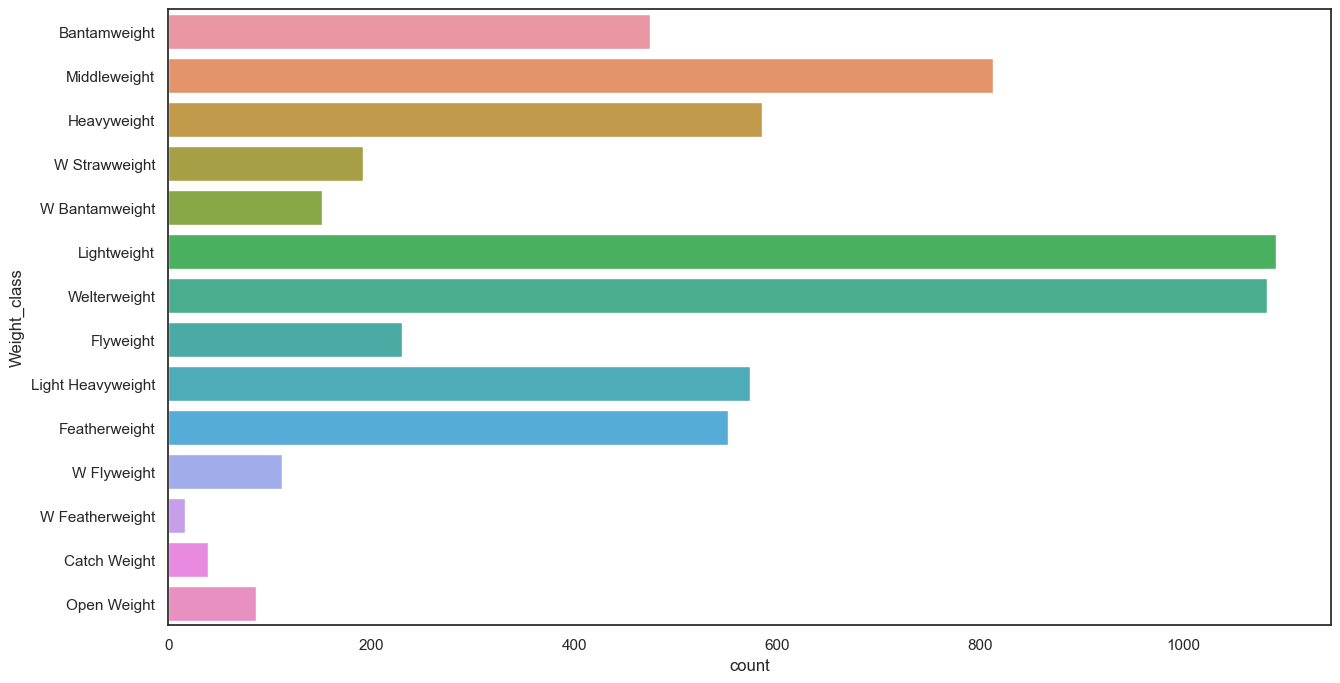

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(y=df_filtered['Weight_class'])

sns.set()
sns.set(style="white")
plt.show()

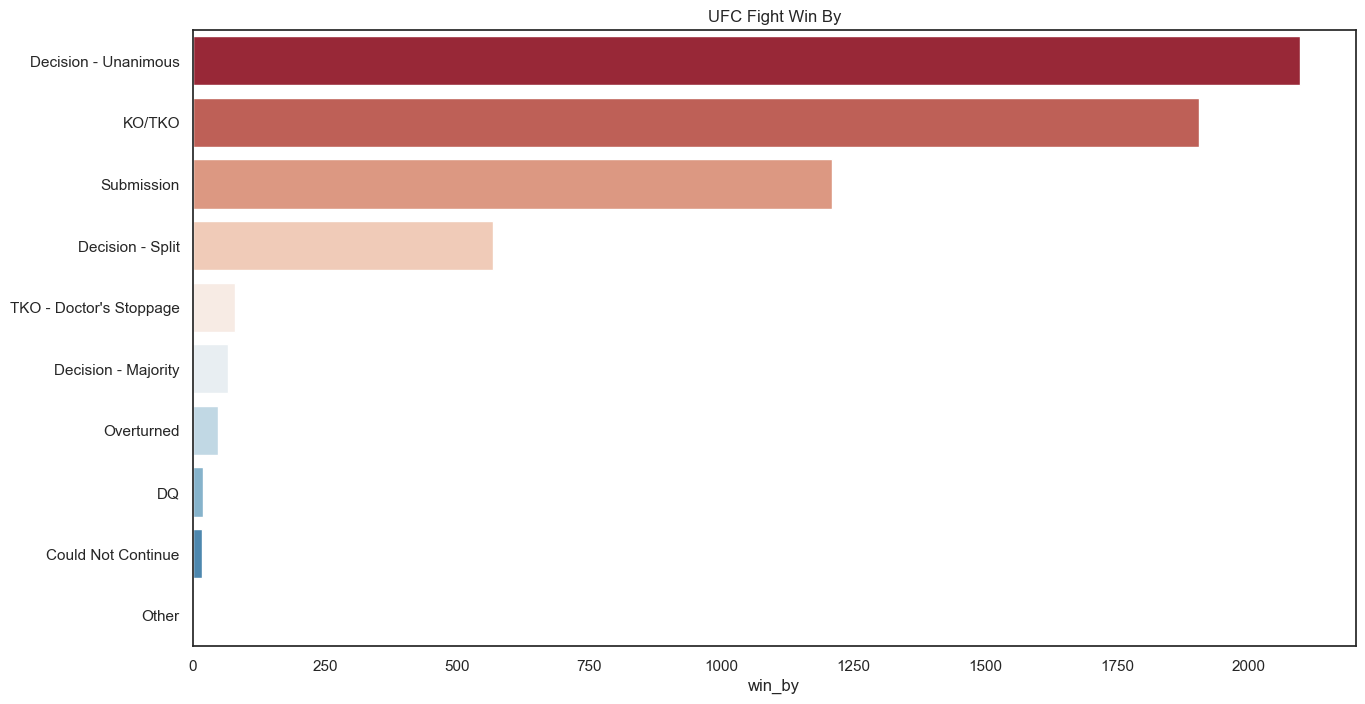

In [17]:
values = df['win_by'].value_counts()
labels = values.index

plt.figure(figsize=(15,8))

sns.barplot(x=values,y=labels, palette='RdBu')

plt.title('UFC Fight Win By')
plt.show()

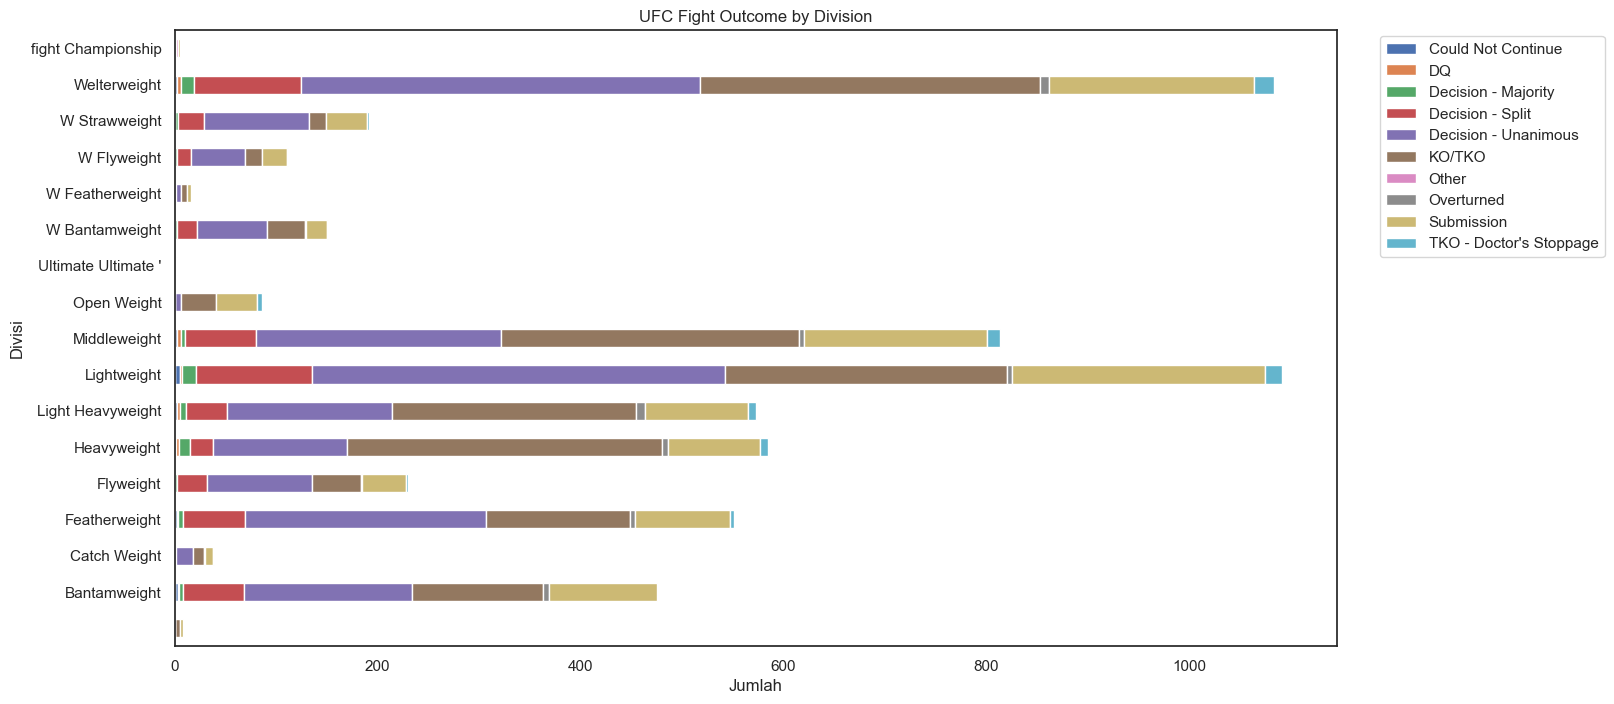

In [18]:
bar = df.groupby(['Weight_class', 'win_by']).size().reset_index().pivot(columns='win_by', index='Weight_class', values=0)
bar.plot(kind='barh', stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.23, 0.99), loc=1, borderaxespad=0.)
plt.title('UFC Fight Outcome by Division')
plt.xlabel('Jumlah')
plt.ylabel('Divisi')
plt.show()

In [19]:
Fighter = pd.concat([df['R_fighter'], df['B_fighter']], ignore_index=True)

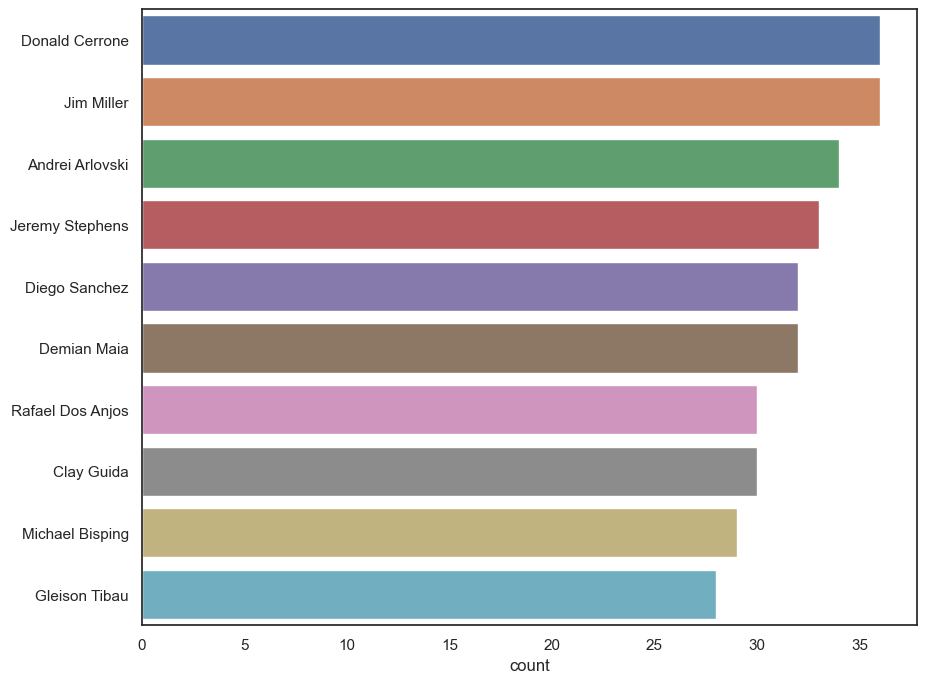

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(y = Fighter, order=pd.value_counts(Fighter).iloc[:10].index)
plt.show()

In [21]:
df['year'] = df['date'].apply(lambda x : x.split('-')[0])
play_counts = pd.DataFrame(df['year'].value_counts().sort_index())
play_counts['count'] = play_counts['year']
play_counts['date_year'] = new['date'].apply(lambda x: x.year)['year'] = play_counts.index


play_counts.head(10)

,year,count
1994,1994,29
1995,1995,34
1996,1996,36
1997,1997,39
1998,1998,21
1999,1999,44
2000,2000,43
2001,2001,40
2002,2002,53
2003,2003,41


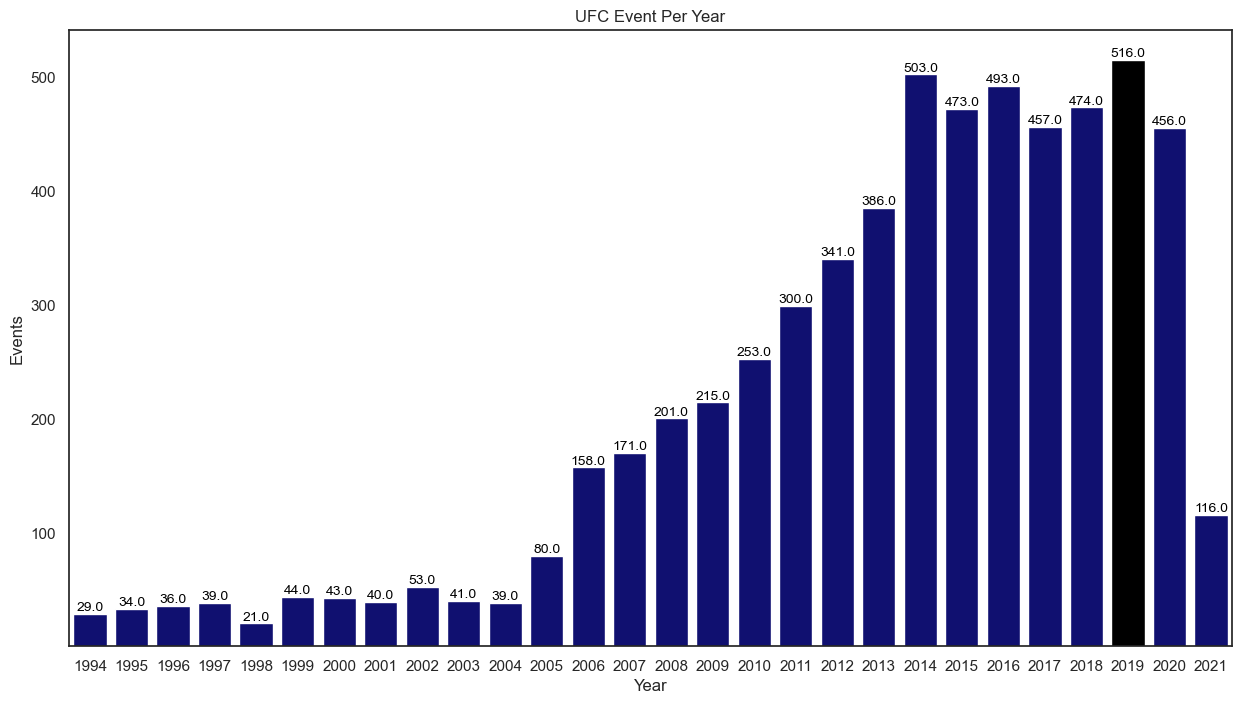

In [34]:
values = df['year'].sort_values(ascending=False).value_counts().sort_index()
labels = values.index

clrs = ['navy' if (y < max(values)) else 'black' for y in values ]

plt.figure(figsize=(15,8))
bar = sns.barplot(x=labels, y=values, palette=clrs)


ax = plt.gca()
y_max = values.max() 
ax.set_ylim(1)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), 
        fontsize=10, color='black', ha='center', va='bottom')
    
plt.xlabel('Year')
plt.ylabel('Events')
plt.title('UFC Event Per Year')
plt.show()



In [31]:
df['country'] = df['location'].apply(lambda x : x.split(',')[-1])

C:\Users\jpelc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


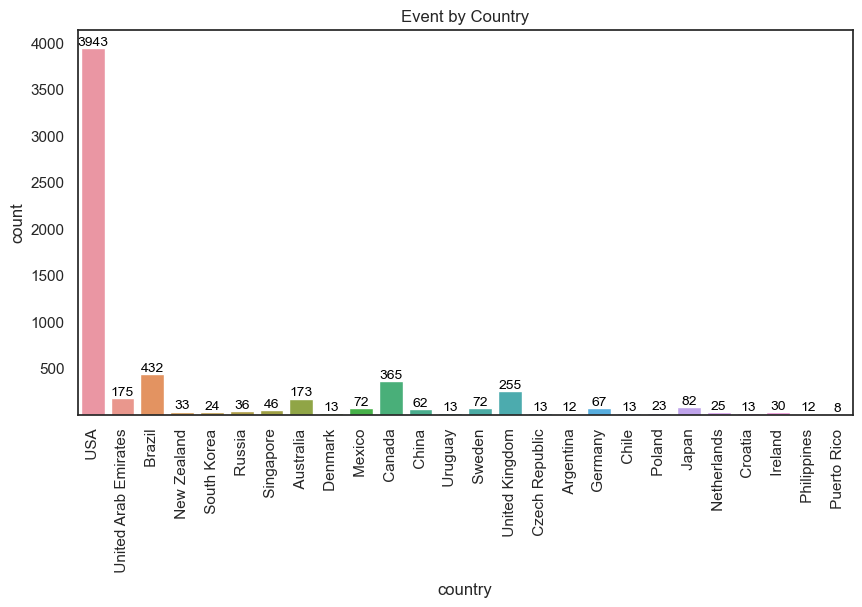

In [33]:
plt.figure(figsize=(10,5))
bar = sns.countplot(df['country'])
plt.xticks(rotation=90)
ax = plt.gca()
y_max = df['country'].value_counts().max() 
ax.set_ylim(1)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), 
        fontsize=10, color='black', ha='center', va='bottom')

plt.title('Event by Country')    
plt.show()

